## Visualizing Filters of a Convolutional Neural Network

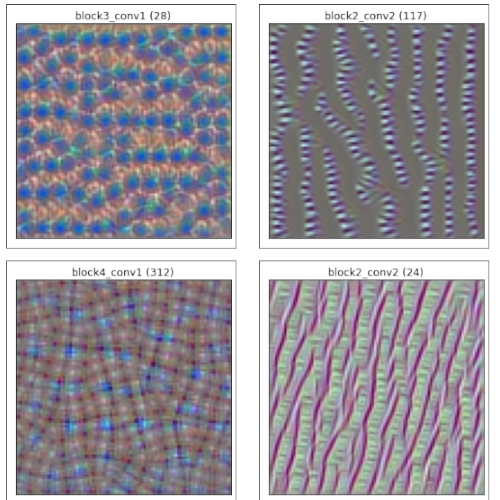

## Task 2: Downloading the Model

In [ ]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
print('Tensorflow version :', tf.__version__)

Tensorflow version : 2.19.0


In [ ]:
modal =  tf.keras.applications.vgg16.VGG16(
    include_top = False, weights = 'imagenet',
    input_shape =  (96,96,3)
)
modal.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 96, 96, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 96, 96, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 48, 48, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Get Layer Output

In [ ]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      modal.input,
      modal.get_layer(layer_name).output
  )
  # The line below was intended to be executed in an interactive session or as a separate test, not as part of the function definition.
  # get_submodel('block1_conv2').summary()

## Task 4: Image Visualization

In [ ]:
def create_image():
  return tf.random.uniform((96,96,3),minval=-0.5,maxval =0.5 )

def plot_image(image,title = 'random ass image'):
  image = image - tf.math.reduce_min(image)
  image = image/tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()

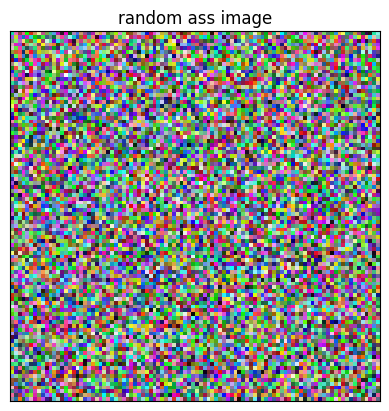

In [ ]:
image = create_image()
plot_image(image)

## Task 5: Training Loop

In [ ]:
def visualize_filter(layer_name, f_index=None, iters =  50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if f_index is None:
    f_index = random.randint(0,num_filters-1)
    assert num_filters> f_index, ' f_index is out of bounds'

    image = create_image()
    verbose_step = int(iters/10)

    for i in range(0,iters):
      with tf.GradientTape() as tape:
        tape.watch(image)
        out = submodel(tf.expand_dims(image,axis = 0))[:,:,:,f_index]
        loss = tf.math.reduce_mean(out)

      grads = tape.gradient(loss,image)
      grads = tf.math.l2_normalize(grads)
      image += grads*10

      if(i+1)%verbose_step ==0:
        print(f'Iteration: {i+1}, Loss: {loss.numpy():.4f}')

      plot_image(image, f'{layer_name}, {f_index}')

## Task 6: Final Results

In [ ]:
print([layer.name for layer in modal.layers if 'conv' in  layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


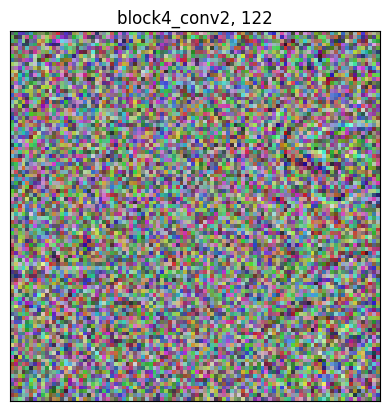

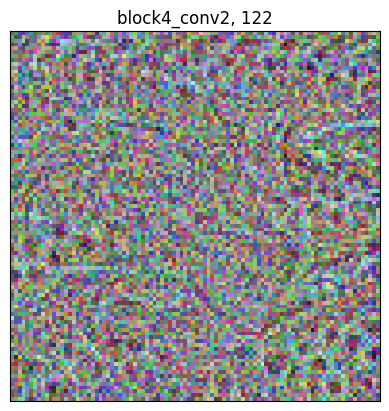

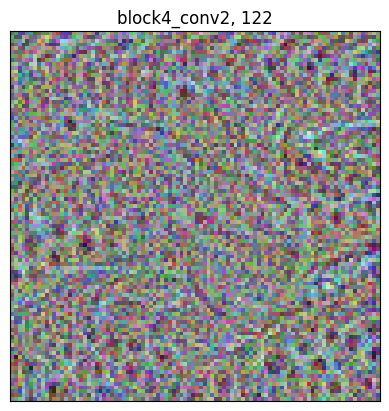

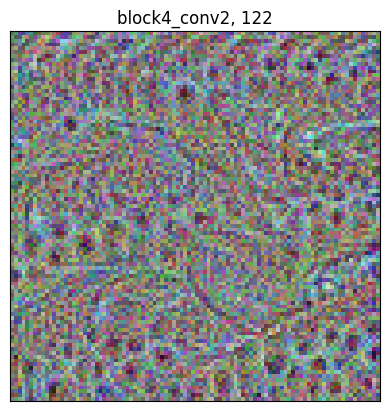

Iteration: 5, Loss: 27.4498


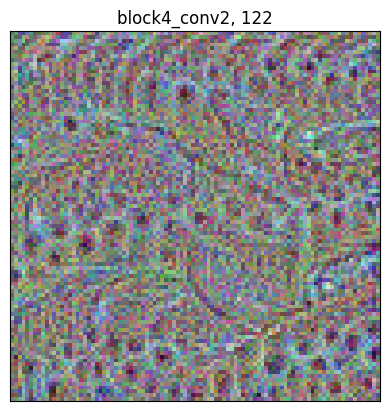

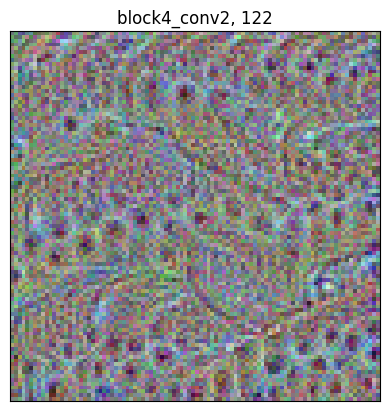

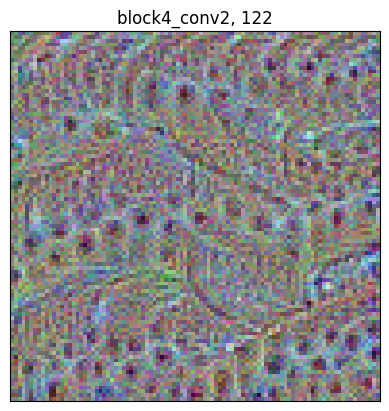

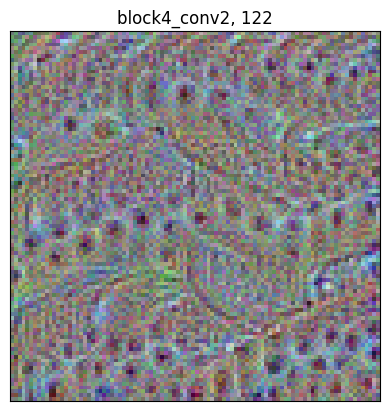

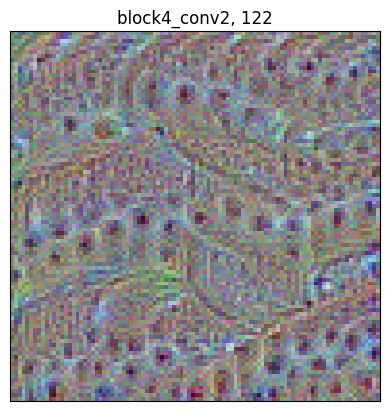

Iteration: 10, Loss: 50.1853


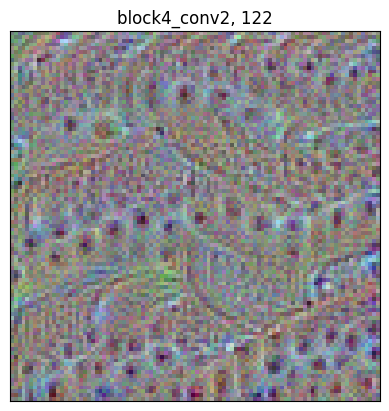

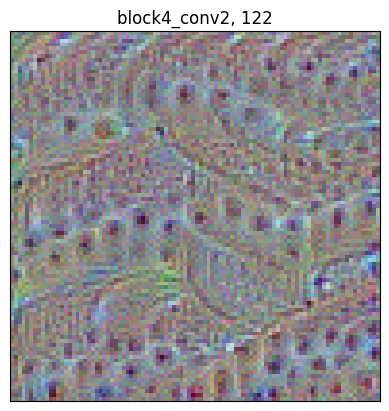

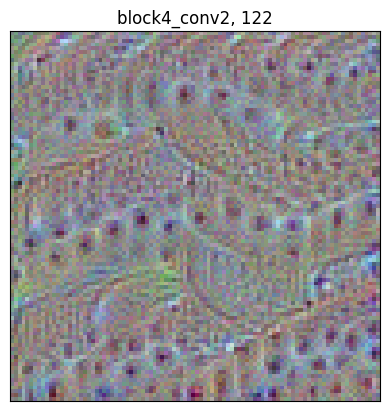

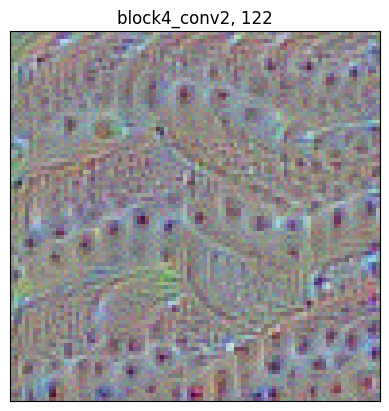

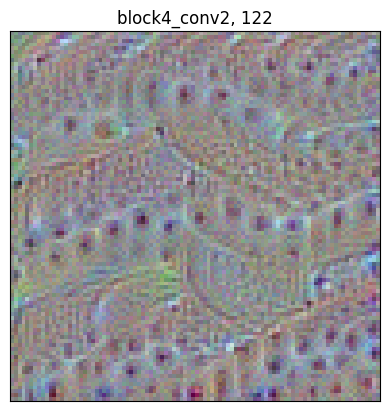

Iteration: 15, Loss: 69.1381


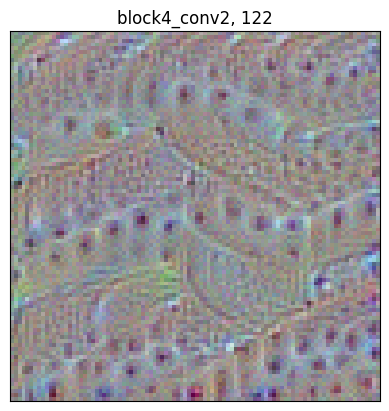

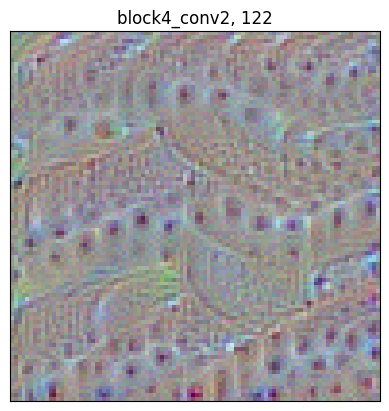

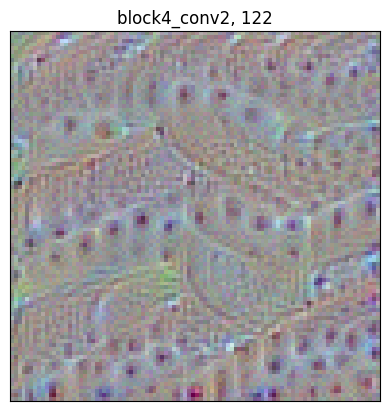

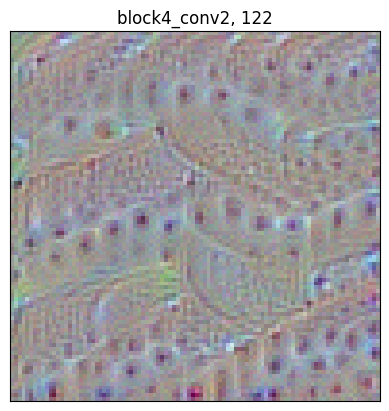

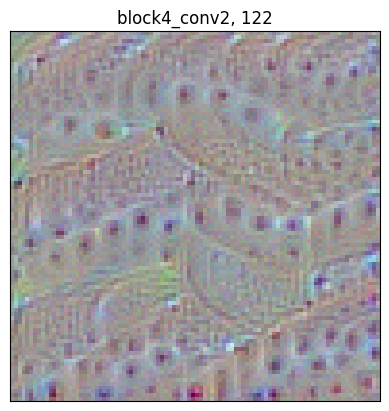

Iteration: 20, Loss: 88.9974


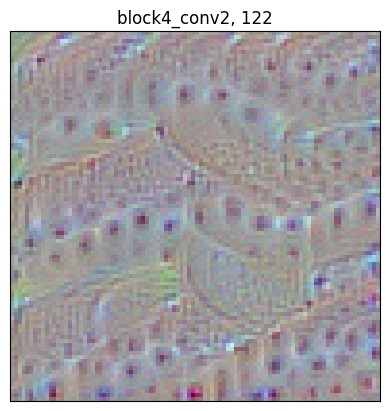

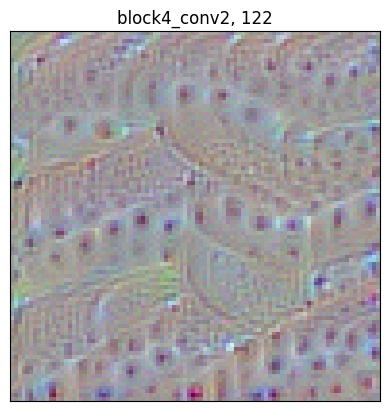

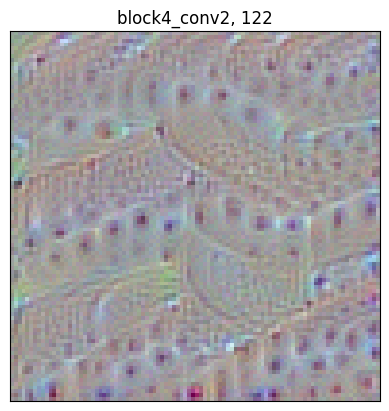

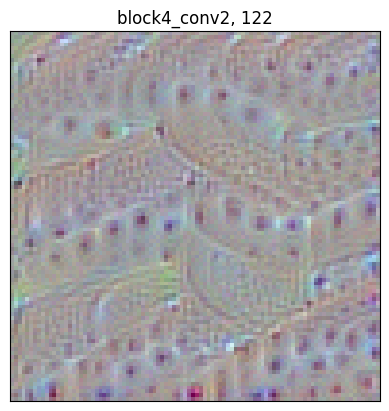

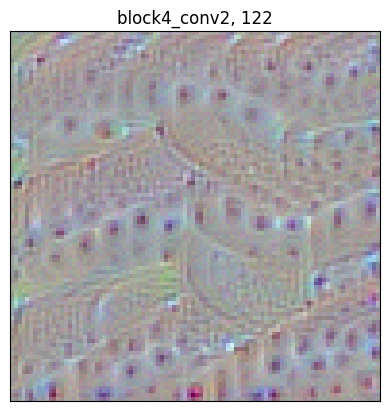

Iteration: 25, Loss: 110.4451


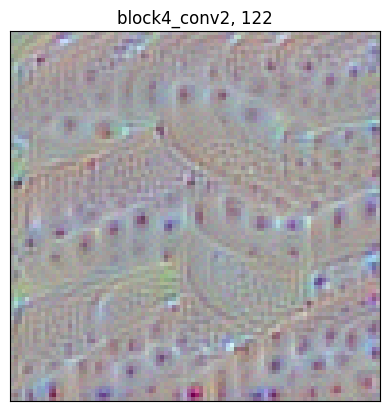

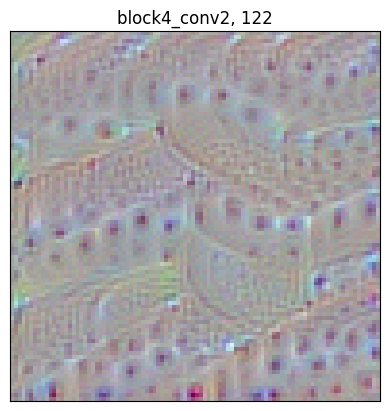

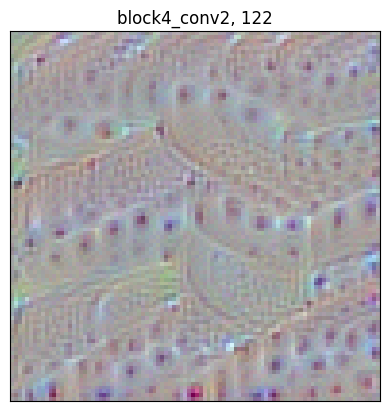

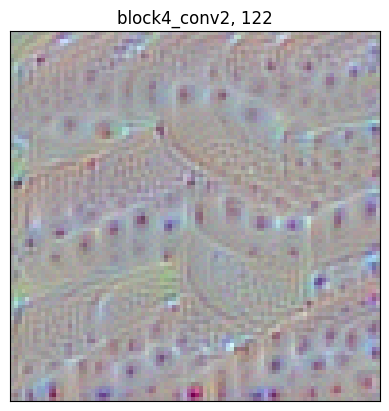

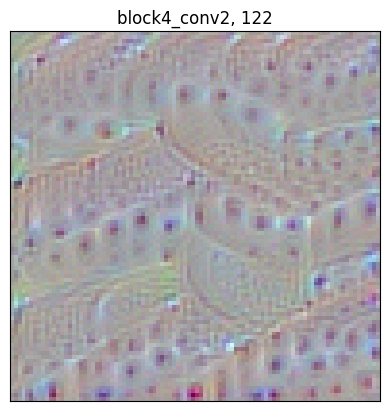

Iteration: 30, Loss: 133.6911


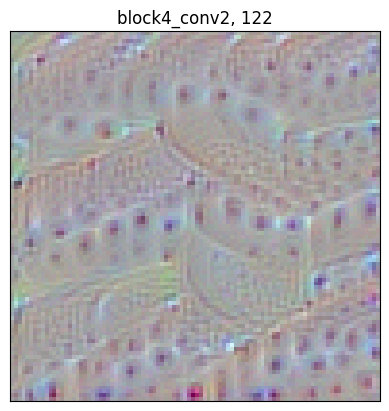

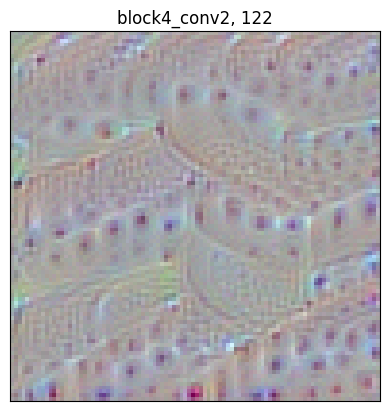

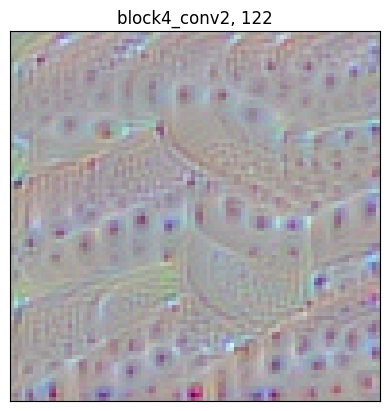

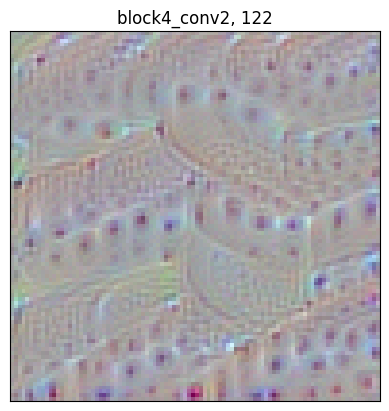

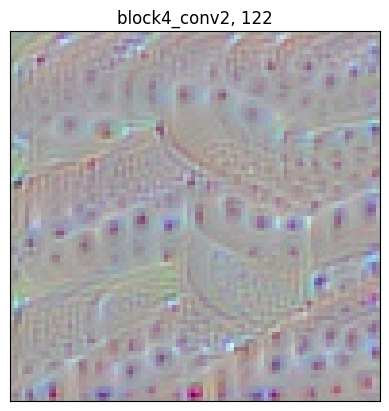

Iteration: 35, Loss: 159.1594


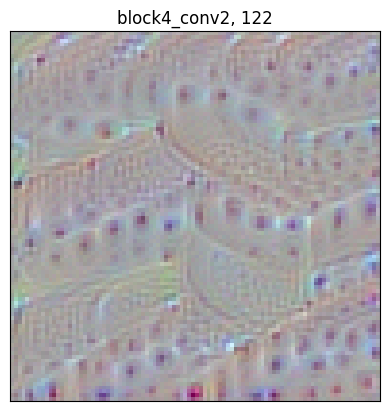

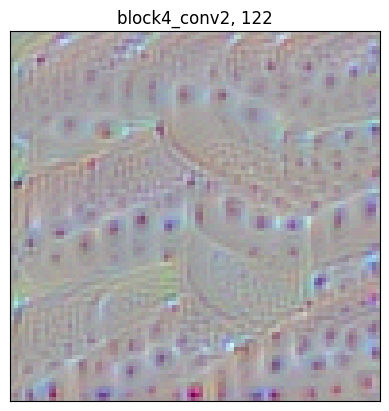

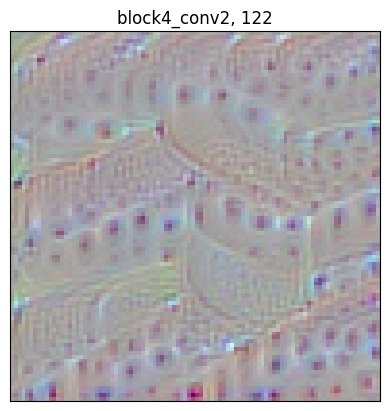

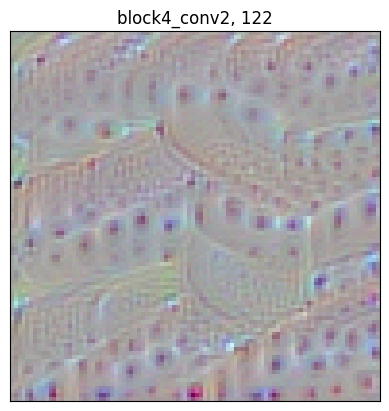

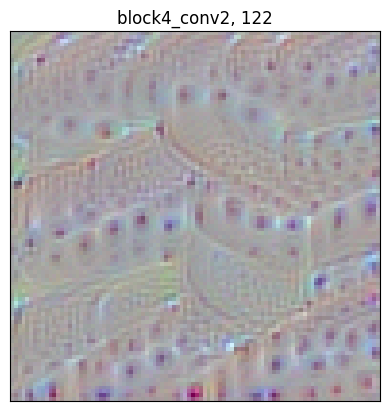

Iteration: 40, Loss: 186.6190


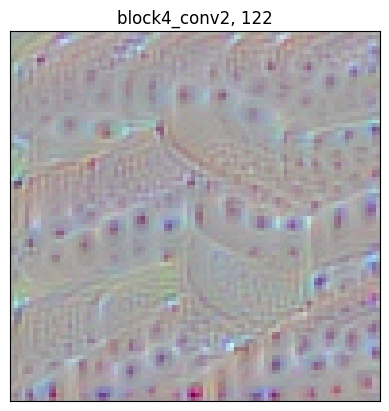

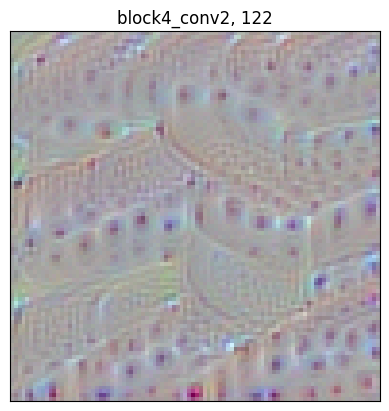

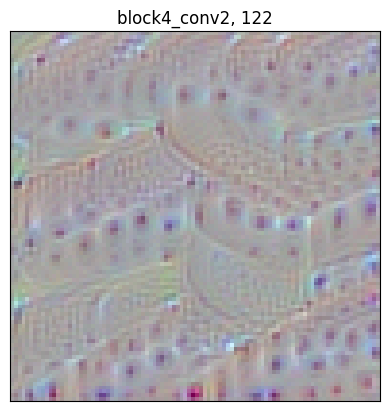

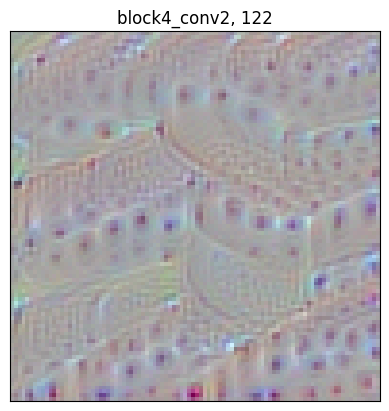

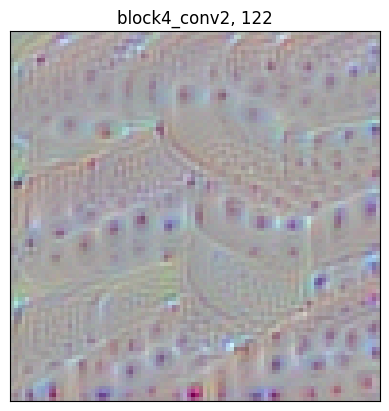

Iteration: 45, Loss: 216.2842


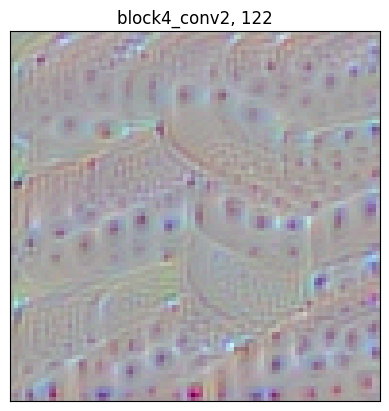

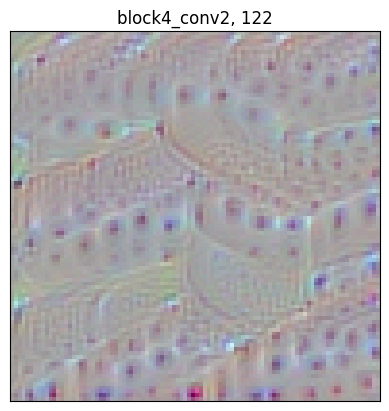

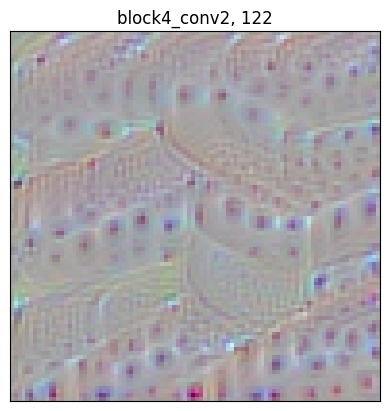

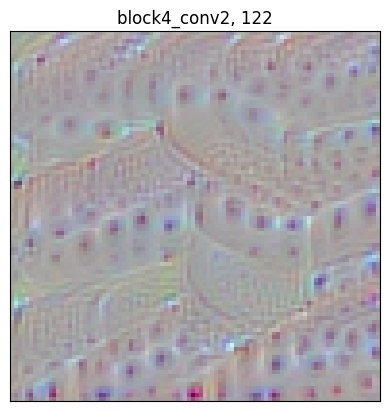

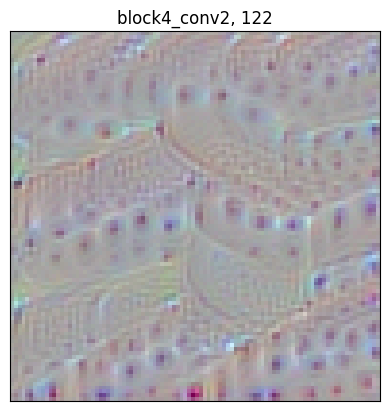

Iteration: 50, Loss: 246.8321


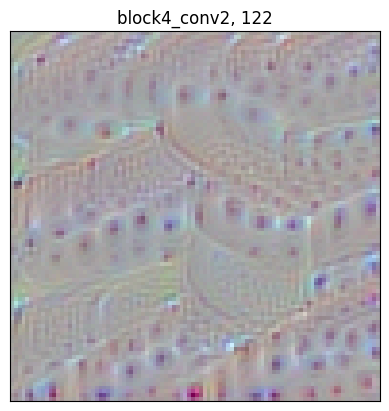

In [ ]:
layer_name = 'block4_conv2' # @param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name)